In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(tidyverse)
library(ggthemes)

/home/erindb/miniconda2/envs/dod/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/home/erindb/miniconda2/envs/dod/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0

  warnings.warn(x, RRuntimeWarning)
/home/erindb/miniconda2/envs/dod/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [4]:
## -------------- from mike: --------------
## https://github.com/mhw32/multimodal-embedding/blob/master/manifold.py

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

ALLOWABLE_REDUCERS = ['pca', 'tsne']

def reduce_dimension(embeddings, out_dim=2, reducer_type='pca'):
    """Reduce image/text embeddings to 2 dimensions so
    that we can view them in a plane
    :param embeddings: Nump array
    :param out_dim: reduced dimension size
    :param reducer_type: pca|tsne
    :return: Numpy array - nrows x out_dim numpy
    """
    assert reducer_type in ALLOWABLE_REDUCERS
    if reducer_type == 'pca':
        model = PCA(n_components=out_dim)
    else:
        model = TSNE(n_components=out_dim)
    return model.fit_transform(embeddings)


def img_scatter(x, y, image_paths, ax=None, zoom=1):
    if ax is None: ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, im0 in zip(x, y, image_paths):
        # im0 = get_sample_data(im0)
        im0 = plt.imread(im0)
        im0 = OffsetImage(im0, zoom=zoom)
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

## -----------------------------------------

In [16]:
n_articles = 100
input_matrix_file = "data/wiki/wiki_skipthoughts_%d.npy" %(n_articles)
input_data_file = "data/wiki/wiki_reformatted_%d.csv" %(n_articles)
# load data
df = pd.read_csv(input_data_file)
# load embeddings
embeddings = np.load(input_matrix_file)

In [17]:
tsne_points = reduce_dimension(embeddings, reducer_type="tsne")
tsne_df = df
tsne_df = tsne_df.assign(x = tsne_points[:,0])
tsne_df = tsne_df.assign(y = tsne_points[:,1])

In [18]:
points = reduce_dimension(embeddings)
df = df.assign(x = points[:,0])
df = df.assign(y = points[:,1])

In [8]:
df

,Unnamed: 0,doc_id,doc_title,par_id,par_in_doc,par_in_sec,s_id,s_in_doc,s_in_par,s_in_sec,sec_id,sec_in_doc,sec_level,sec_title,sentence,x,y
0,0,0,Valkyria Chronicles III,0,0,0,0,0,0,0,0,0,0,NaN,Senjō no Valkyria 3 : Unrecorded Chronicles ( ...,0.031760,0.118368
1,1,0,Valkyria Chronicles III,0,0,0,1,1,1,1,0,0,0,NaN,"Valkyria of the Battlefield 3 ) , commonly ref...",-0.072175,0.114553
2,2,0,Valkyria Chronicles III,0,0,0,2,2,2,2,0,0,0,NaN,"Released in January 2011 in Japan , it is the ...",-0.154867,-0.017514
3,3,0,Valkyria Chronicles III,0,0,0,3,3,3,3,0,0,0,NaN,Employing the same fusion of tactical and real...,-0.072195,0.038000
4,4,0,Valkyria Chronicles III,1,1,1,4,4,0,4,0,0,0,NaN,"The game began development in 2010 , carrying ...",-0.243068,-0.175419
5,5,0,Valkyria Chronicles III,1,1,1,5,5,1,5,0,0,0,NaN,While it retained the standard features of the...,-0.180512,-0.246781
6,6,0,Valkyria Chronicles III,1,1,1,6,6,2,6,0,0,0,NaN,Character designer Raita Honjou and composer H...,-0.123191,-0.136069
7,7,0,Valkyria Chronicles III,1,1,1,7,7,3,7,0,0,0,NaN,A large team of writers handled the script .,-0.198066,0.129998
8,8,0,Valkyria Chronicles III,1,1,1,8,8,4,8,0,0,0,NaN,The game 's opening theme was sung by May 'n .,-0.119378,0.152072
9,9,0,Valkyria Chronicles III,2,2,2,9,9,0,9,0,0,0,NaN,"It met with positive sales in Japan , and was ...",-0.243022,-0.178979


In [19]:
cols = "x|y|doc_title|doc_id|s_id|s_in_par|par_in_doc|sentence"
pca_df = df.filter(regex=cols, axis=1)
tsne_df = tsne_df.filter(regex=cols, axis=1)

In [20]:
%%R -i pca_df
head(pca_df)

/home/erindb/miniconda2/envs/dod/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


  doc_id               doc_title par_in_doc s_id s_in_par
0      0 Valkyria Chronicles III          0    0        0
1      0 Valkyria Chronicles III          0    1        1
2      0 Valkyria Chronicles III          0    2        2
3      0 Valkyria Chronicles III          0    3        3
4      0 Valkyria Chronicles III          1    4        0
5      0 Valkyria Chronicles III          1    5        1
                                                                                                                                                                                                                                                                                                                                            sentence
0                                                                                                                                                                                                                                                            

In [21]:
%%R -i tsne_df
head(tsne_df)

  doc_id               doc_title par_in_doc s_id s_in_par
0      0 Valkyria Chronicles III          0    0        0
1      0 Valkyria Chronicles III          0    1        1
2      0 Valkyria Chronicles III          0    2        2
3      0 Valkyria Chronicles III          0    3        3
4      0 Valkyria Chronicles III          1    4        0
5      0 Valkyria Chronicles III          1    5        1
                                                                                                                                                                                                                                                                                                                                            sentence
0                                                                                                                                                                                                                                                            

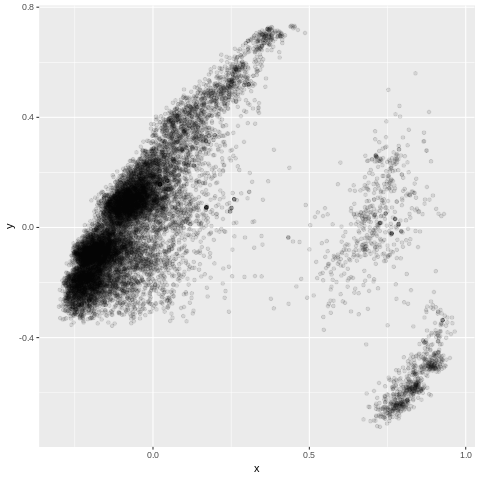

In [22]:
%%R
pca_df %>%
ggplot(aes(x=x, y=y)) +
geom_point(alpha=1/10)

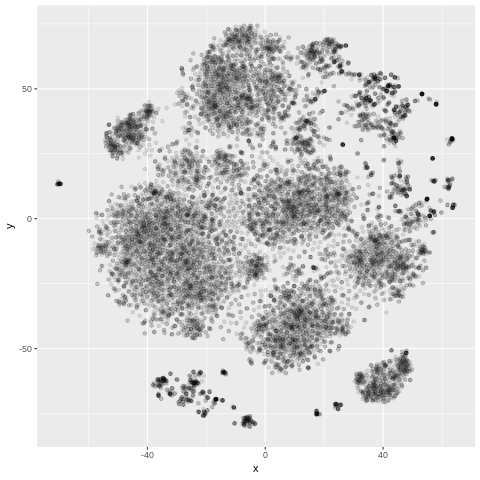

In [23]:
%%R
tsne_df %>%
ggplot(aes(x=x, y=y)) +
geom_point(alpha=1/10)

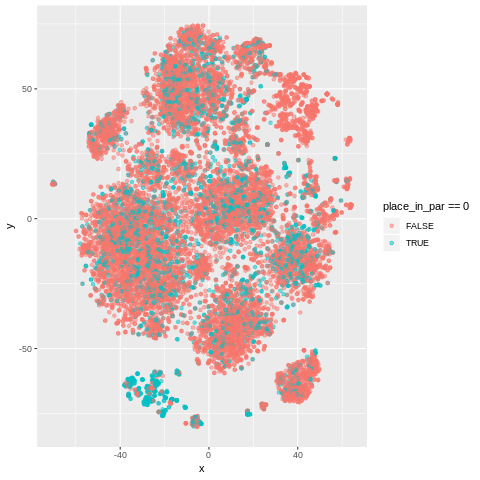

In [32]:
%%R
tsne_df %>%
group_by(doc_id, par_in_doc) %>%
mutate(place_in_par = s_in_par/length(s_in_par)) %>%
# filter(place_in_par == 0) %>%
ggplot(aes(x=x, y=y, colour=place_in_par==0)) +
geom_point(alpha=1/2)

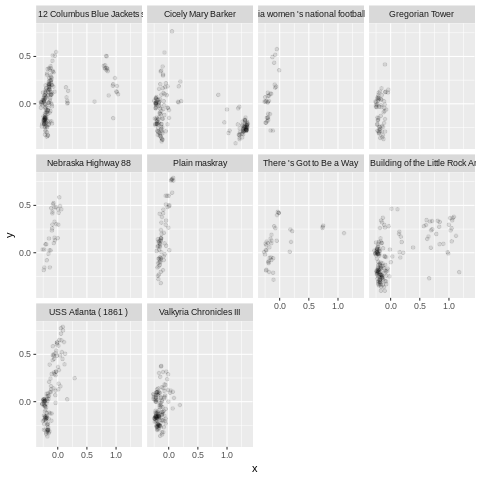

In [14]:
%%R
pca_df %>%
filter(doc_id < 20) %>%
ggplot(aes(x=x, y=y)) +
geom_point(alpha=1/10) +
facet_wrap(~doc_title)

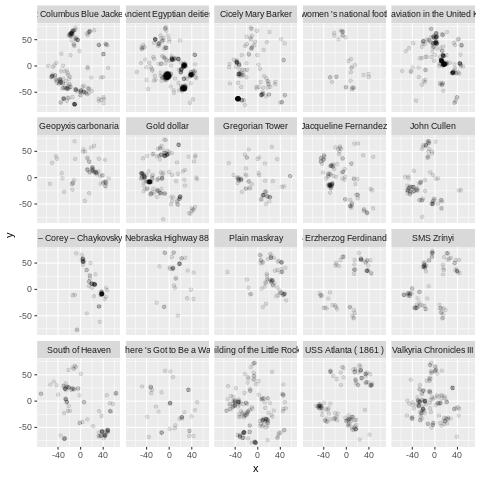

In [24]:
%%R
tsne_df %>%
filter(doc_id < 20) %>%
ggplot(aes(x=x, y=y)) +
geom_point(alpha=1/10) +
facet_wrap(~doc_title)

In [ ]:
%%R
(pca_df %>%
filter(doc_id < 20) %>%
filter(y < 0.4 & x > 0.8))$sentence